<a href="https://colab.research.google.com/github/BalaChethan/Data_Science_Projects/blob/main/Bala_Chethan_Mallavarapu_Financial_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [ ]:
#!pip install pmdarima

# Paul's Code:

Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


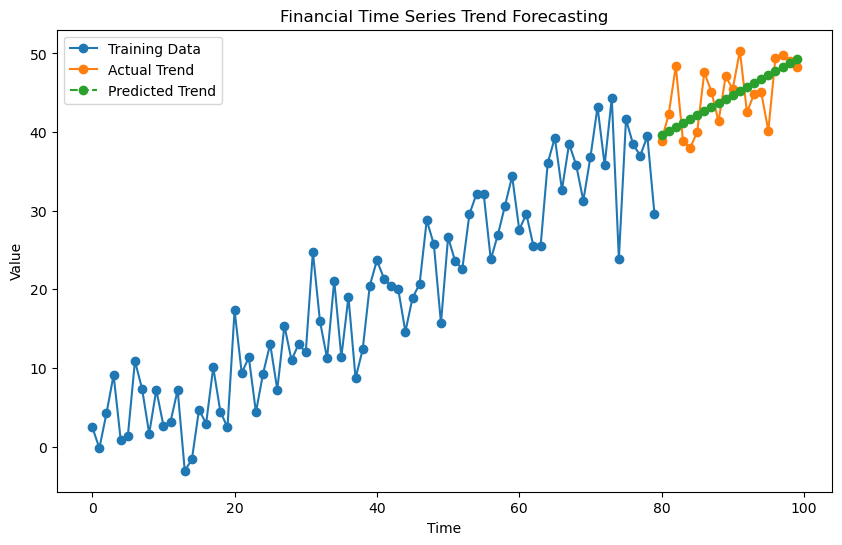

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


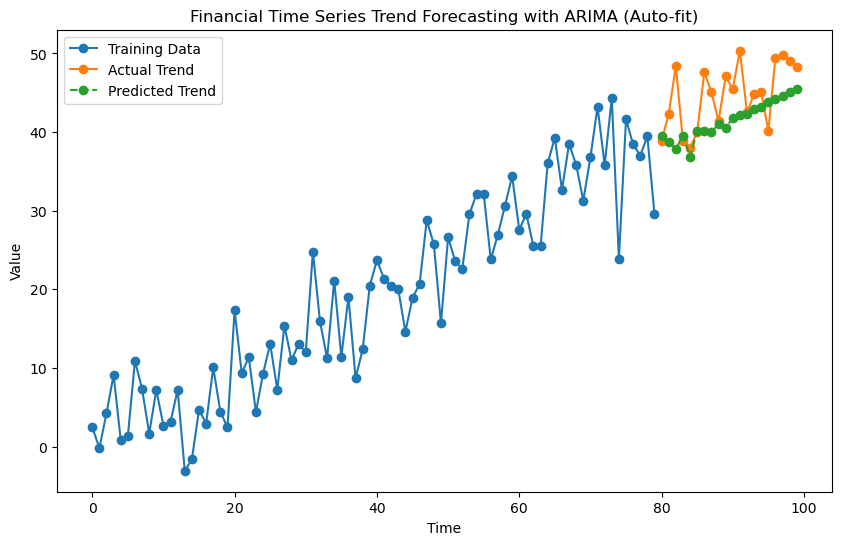

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

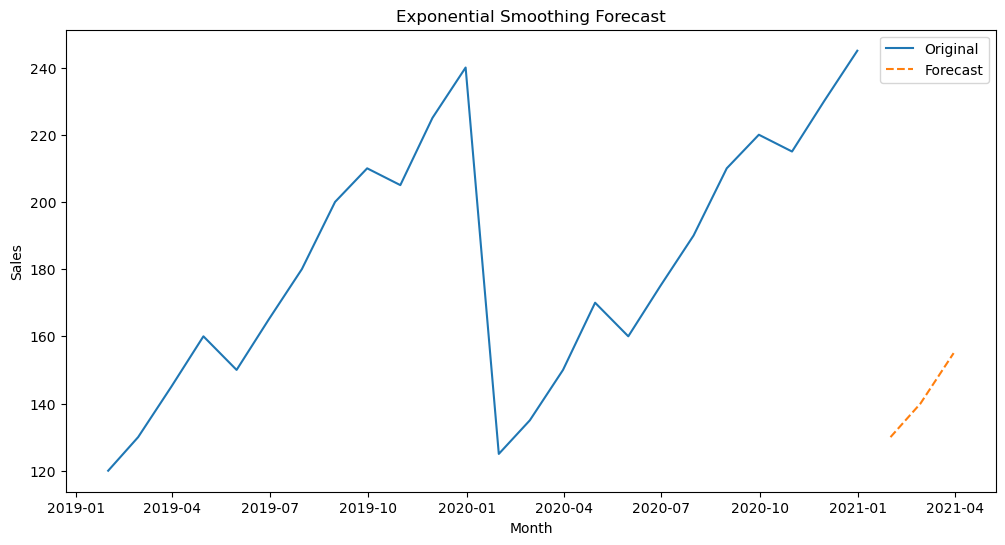

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
#!pip install yfinance

# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

[*********************100%%**********************]  1 of 1 completed


-------Raw Data-------
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.670013   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  
-------Engineered Data-------
             Open        High         Low       Close   Adj Close  \
count  520.000000  520.000000  520.000000  520.000000  520.000000   
mean   163.438962  165.284558  161.752211  163.604731  162.735177   
std     17.955377   17.635141   18.151914   17.869666

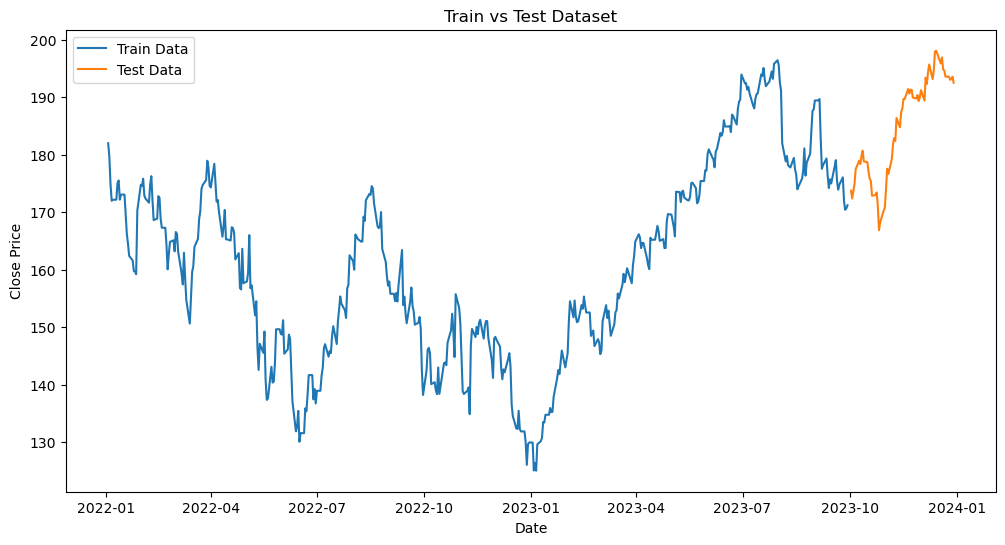

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

print('-------Raw Data-------')
print(stock_data.head())

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
print(stock_data.describe())

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]

# Visualization of Train and Test Datasets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**ASSIGNMENT TIME SERIES ANALYSIS: STOCK PRICE PREDICTION OF AMAZON**

In [ ]:
# Install necessary libraries
# !pip install yfinance statsmodels

In [ ]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
end_date = datetime.today().strftime('%Y-%m-%d')
#Download Amazon.com Inc. Stock Data
stock_data = yf.download('AMZN', start = '2022-01-01', end = end_date)
stock_data.sort_index(ascending=True, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Feature Engineering
#calculating rolling averages for 7-days, 14-days and 30-days.
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['14_day_avg'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

#calculating Daily Returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

#calculating Bollinger bands
stock_data['Bollinger_upper'] = stock_data['7_day_avg'] + 2 * stock_data['Close'].rolling(window=7, min_periods=1).std()
stock_data['Bollinger_lower'] = stock_data['7_day_avg'] - 2 * stock_data['Close'].rolling(window=7, min_periods=1).std()

#calculating rolling average of volume
stock_data['volume_rolling_avg'] = stock_data['Volume'].rolling(window=7, min_periods=1).mean()

#Calculating previous day's prices.
stock_data['lagged_prices'] = stock_data['Close'].shift(1)

# Calculating day of the week and month
stock_data['day_of_week'] = stock_data.index.dayofweek
stock_data['month'] = stock_data.index.month

In [ ]:
# display missing values
print("Missing Values:\n"),
print(stock_data.isnull().sum())

Missing Values:

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_avg             0
14_day_avg            0
30_day_avg            0
Daily_Return          1
Bollinger_upper       1
Bollinger_lower       1
volume_rolling_avg    0
lagged_prices         1
day_of_week           0
month                 0
dtype: int64


In [ ]:
#Dropping null values
stock_data.dropna(inplace=True)

In [ ]:
#
print(
    "First 5 rows of the dataset:\n", stock_data.head(),
)

First 5 rows of the dataset:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
2022-01-10  160.585495  161.661499  156.304504  161.485992  161.485992   

              Volume   7_day_avg  14_day_avg  30_day_avg  Daily_Return  \
Date                                                                     
2022-01-04  70726000  168.963249  168.963249  168.963249     -0.016916   
2022-01-05  64302000  167.427831  167.427831  167.427831     -0.018893   
2022-01-06  51958000  166.384373  166.384373  166.384373     -0.006711   
2022-01-07  46606000  165.618298  165.618298  165.618298     -0.004288   
2022-01

In [ ]:
# summary statistics
print(
    "Summary statistics of the dataset:\n", stock_data.describe()
)

Summary statistics of the dataset:
              Open        High         Low       Close   Adj Close  \
count  653.000000  653.000000  653.000000  653.000000  653.000000   
mean   136.229078  138.052925  134.283079  136.197686  136.197686   
std     30.190124   30.216817   30.041624   30.126442   30.126442   
min     82.800003   83.480003   81.430000   81.820000   81.820000   
25%    111.439499  114.000000  109.050003  111.750000  111.750000   
50%    133.779999  135.190002  132.410004  133.619995  133.619995   
75%    157.800003  160.078995  155.550507  158.100494  158.100494   
max    200.089996  201.199997  199.050003  200.000000  200.000000   

             Volume   7_day_avg  14_day_avg  30_day_avg  Daily_Return  \
count  6.530000e+02  653.000000  653.000000  653.000000    653.000000   
mean   6.189188e+07  136.214055  136.160761  135.857312      0.000279   
std    2.892574e+07   29.943049   29.676900   28.873611      0.024935   
min    2.237840e+07   83.874286   84.748572   88.2

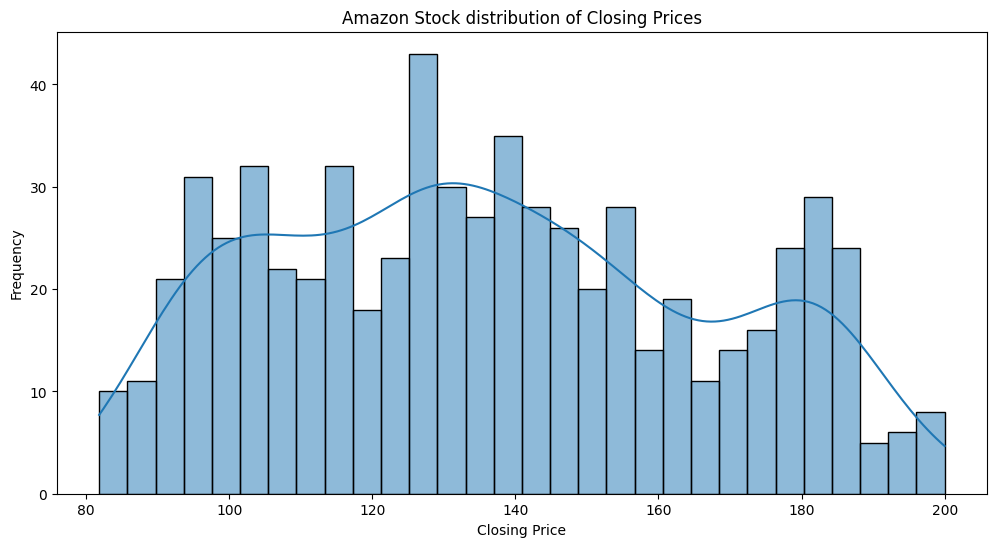

In [ ]:
# Visualizing the distribution of Closing prices
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Close'], bins = 30, kde=True)
plt.title('Amazon Stock distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

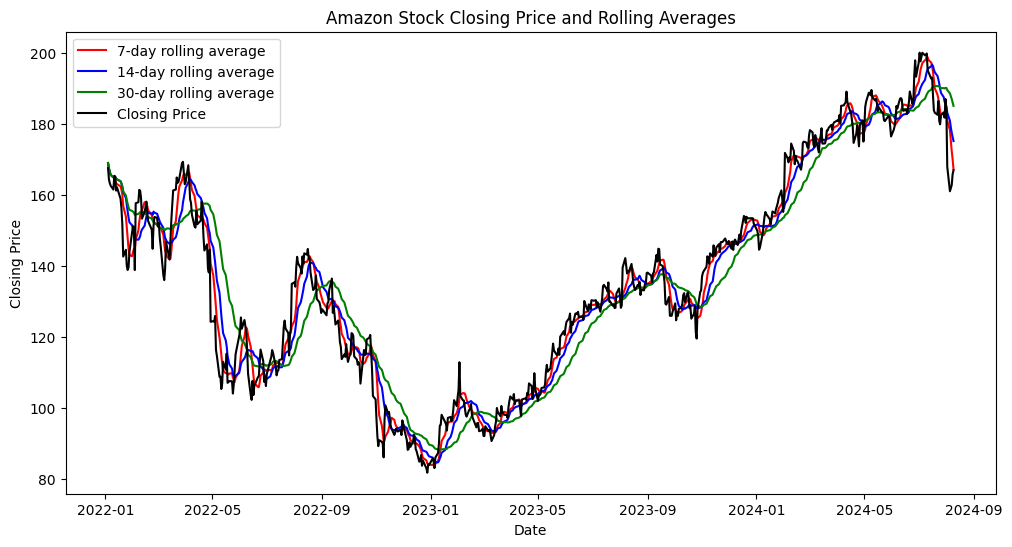

In [ ]:
# visualization for 7, 14 and 30 day rolling averages
plt.figure(figsize = (12,6))
plt.plot(stock_data['7_day_avg'], label = '7-day rolling average', color = 'red')
plt.plot(stock_data['14_day_avg'], label = '14-day rolling average', color = 'blue')
plt.plot(stock_data['30_day_avg'], label = '30-day rolling average', color = 'green')
plt.plot(stock_data['Close'], label = 'Closing Price', color = 'black')
plt.title('Amazon Stock Closing Price and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


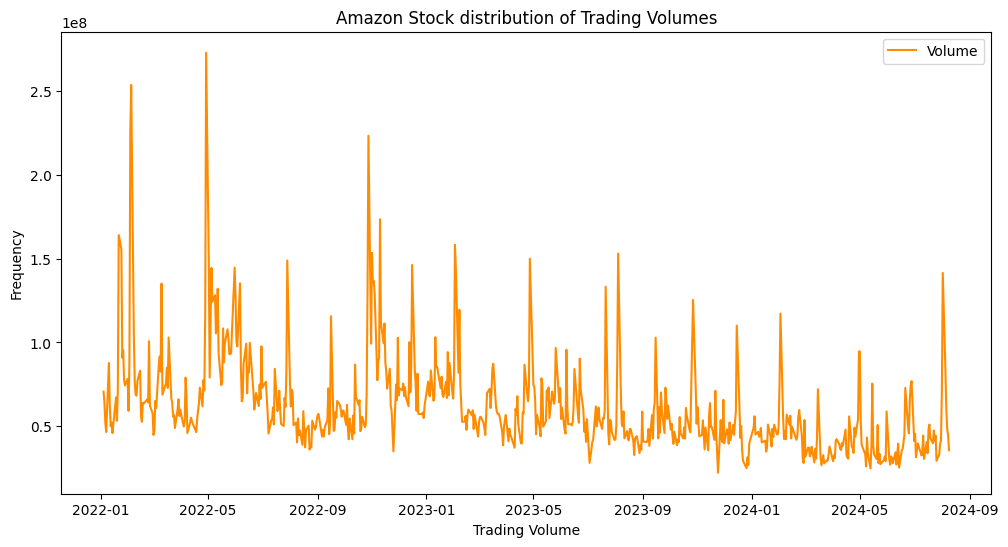

In [ ]:
#Visualizing the distribution of Trading Volumes
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Volume'], label='Volume', color = 'darkorange')
plt.title('Amazon Stock distribution of Trading Volumes')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Prepare data for modeling
features = ['7_day_avg', '14_day_avg', '30_day_avg', 'Daily_Return',
            'Bollinger_upper', 'Bollinger_lower', 'volume_rolling_avg',
            'lagged_prices', 'day_of_week', 'month']
X = stock_data[features]
y = stock_data['Close']

# Splitting training and testing data
train_size = int(0.8 * len(stock_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
#Building Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#making predictions with the Test dataset.
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Building Exponential smoothing model
es_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12,damped_trend=True).fit()
es_predictions = es_model.forecast(len(y_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#creating a function to calculate performance metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Performance:"),
    print(f"Mean Absolute Error (MAE): {mae:.2f}"),
    print(f"Mean Squared Error (MSE): {mse:.2f}"),
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, es_predictions, "Exponential Smoothing")

Linear Regression Performance:
Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 1.04
Root Mean Squared Error (RMSE): 1.02

Exponential Smoothing Performance:
Mean Absolute Error (MAE): 22.05
Mean Squared Error (MSE): 553.35
Root Mean Squared Error (RMSE): 23.52



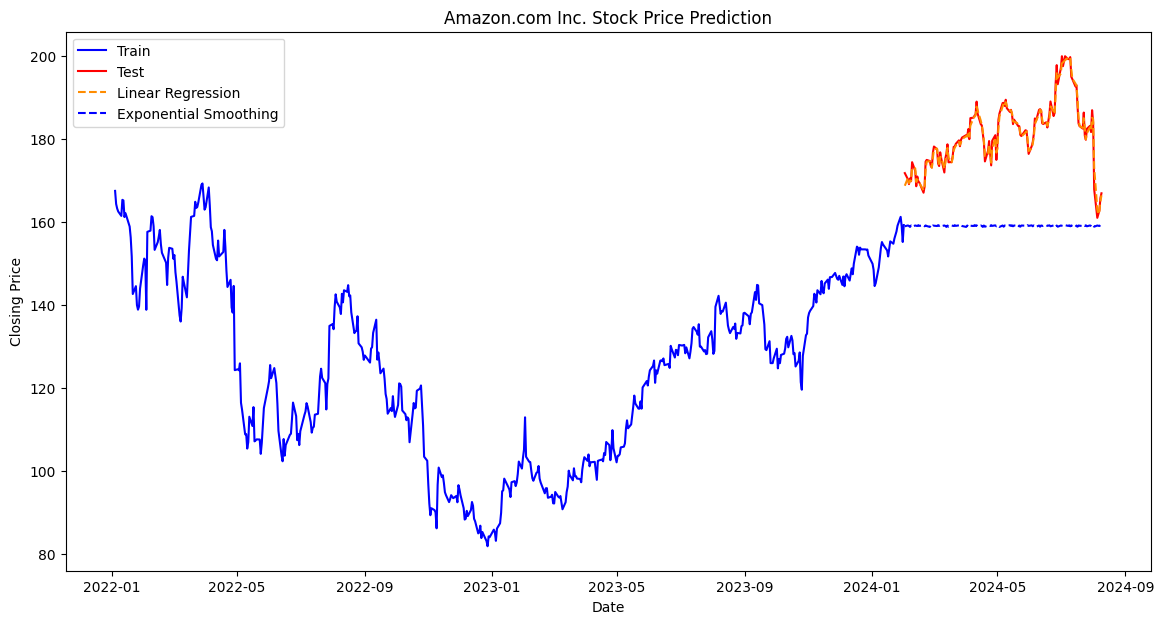

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot
plt.plot(y_train.index, y_train, label='Train', color='blue')
plt.plot(y_test.index, y_test, label = 'Test', color = 'red')
plt.plot(y_test.index, lr_predictions, label='Linear Regression', color='darkorange', linestyle='--')
plt.plot(y_test.index, es_predictions, label='Exponential Smoothing', color='blue', linestyle='--')
plt.title('Amazon.com Inc. Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Code Summary**
This code performs time series analysis to predict Amazon.com Inc.'s stock prices using historical data. The analysis is divided into three main sections: data exploration, feature engineering, and model building.

**1. Data Exploration**

*  **Data Acquisition:**

  *  The code uses the yfinance library to download Apple Inc. stock data from January 1, 2022, to the present date.
  *  It displays the first few rows and summary statistics of the dataset, checks for missing values, and visualizes the distribution of closing prices and trading volumes.
*  **Visualization:**

  *  The closing price trend is visualized to observe the overall movement of stock prices.
  *  A correlation matrix is generated to explore the relationships between different features.
  
**2. Feature Engineering**

  Several features are engineered to enhance the predictive capabilities of the models:
  * **Moving Averages:** 7-day, 14-day, and 30-day moving averages of the closing price.
  * **Daily Returns:** Percentage change in closing prices.
  * **Bollinger Bands:** Upper and lower Bollinger bands based on a 7-day moving average.
  * **Volume Moving Average:** 7-day moving average of trading volume.
  * **Lagged Close Price:** Previous day's closing price.
  * **Day of Week:** Encoded as a numerical feature from 0 (Monday) to 6 (Sunday).
  * ** month:** month of the stock.

**3. Model Building**

  * **Data Splitting:**

    *  The dataset is split into training and testing sets with an 80-20 ratio.
  * **Linear Regression Model:**

    * A linear regression model is trained using the engineered features to predict stock prices.
    * The model's performance is evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
  * **Exponential Smoothing Model:**

    * An exponential smoothing model is fitted to the training data, accounting for additive trend and seasonality.
    * Forecasted values are obtained for the test period and evaluated using the same metrics.
  * **Model Evaluation:**

    * The performance metrics indicate that the linear regression model outperforms the exponential smoothing model in this scenario.
    * Actual vs. predicted stock prices are plotted for both models to visualize prediction accuracy.


**Interpretation of Results**


**Linear Regression:** The linear regression model performs significantly better than the exponential smoothing model in terms of predictive accuracy. Its lower MAE, MSE, and RMSE values suggest it effectively captures the linear relationships between the engineered features and the stock prices.

**Exponential Smoothing:** The exponential smoothing model's poorer performance might be due to its assumptions not aligning well with the characteristics of the stock price data. Exponential smoothing is designed to capture trends and seasonality, but if the data has complex patterns or is not very seasonal, this method might struggle.

**Real-World Implications**
**Investment Decisions:** In real-world scenarios, a model with lower prediction errors, like the linear regression model in this case, would be more reliable for making investment decisions, as it provides more accurate forecasts of future prices.

**Risk Management:** Accurate stock price predictions can assist in risk management strategies by enabling investors to anticipate price movements and adjust their portfolios accordingly.

**Model Selection:** The significant difference in performance highlights the importance of selecting the right model for the data characteristics. While exponential smoothing can be effective for certain types of time series data, it may not always be suitable for stock price forecasting if the data doesn't exhibit strong seasonality or simple trends.



## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

**LSTM MODEL**

In [ ]:
# downloading neccessary libraries.
# !pip install tensorflow

In [ ]:
#import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# using datetime library to predict today's date.
end_date = datetime.today().strftime('%Y-%m-%d')
#Download Amazon.com Inc. Stock Data
stock_data = yf.download('AMZN', start = '2022-01-01', end = end_date)
stock_data.sort_index(ascending=True, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Feature Engineering
#calculating rolling averages for 7-days, 14-days and 30-days.
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['14_day_avg'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

#calculating Daily Returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

#calculating Bollinger bands
stock_data['Bollinger_upper'] = stock_data['7_day_avg'] + 2 * stock_data['Close'].rolling(window=7, min_periods=1).std()
stock_data['Bollinger_lower'] = stock_data['7_day_avg'] - 2 * stock_data['Close'].rolling(window=7, min_periods=1).std()

#calculating rolling average of volume
stock_data['volume_rolling_avg'] = stock_data['Volume'].rolling(window=7, min_periods=1).mean()

#Calculating previous day's prices.
stock_data['lagged_prices'] = stock_data['Close'].shift(1)

# Calculating day of the week and month
stock_data['day_of_week'] = stock_data.index.dayofweek
stock_data['month'] = stock_data.index.month

In [ ]:
#dropping null values
stock_data.dropna(inplace=True)

In [ ]:
# Prepare data for modeling
features = ['7_day_avg', '14_day_avg', '30_day_avg', 'Daily_Return',
            'Bollinger_upper', 'Bollinger_lower', 'volume_rolling_avg',
            'lagged_prices', 'day_of_week', 'month']
X = stock_data[features]
y = stock_data['Close'].values

In [ ]:
# Normalize features and target
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
# splitting data
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [ ]:
# reshaping the data.
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# building the lstm model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Implementing early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Training the model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose = 1, validation_split=0.1, callbacks = [early_stopping])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1167 - val_loss: 0.1315
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0318 - val_loss: 0.0051
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - val_loss: 0.0171
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 8.5649e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 3.5706e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 5.1155e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 3.2775e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 3.0881e-04
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# Predict on test data
y_pred_scaled = lstm_model.predict(X_test)
# Reshape predictions to 2D
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


In [ ]:
# Verify dimensions
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test_actual: {y_test_actual.shape}")

Shape of y_pred: (131, 1)
Shape of y_test_actual: (131, 1)


In [ ]:
# Calculatin performance Metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")
evaluate_model(y_test_actual, y_pred, "LSTM")

LSTM Performance:
Mean Absolute Error (MAE): 4.11
Mean Squared Error (MSE): 26.93
Root Mean Squared Error (RMSE): 5.19



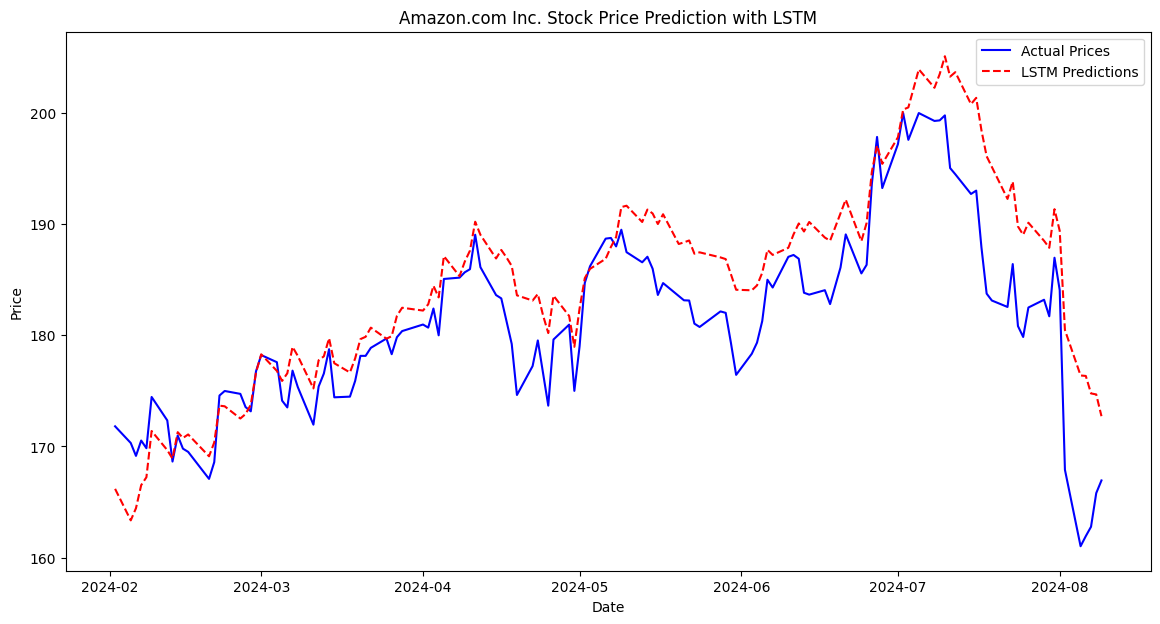

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index[train_size:], y_test_actual, label='Actual Prices', color='blue')
plt.plot(stock_data.index[train_size:], y_pred, label='LSTM Predictions', color='red', linestyle='--')
plt.title('Amazon.com Inc. Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Code Summary:**

**Data Preparation:**

  * Download Data: Fetch historical stock data for Amazon.com Inc. from Yahoo Finance using the yfinance library.
  * Feature Engineering: Create features including moving averages, Bollinger Bands, daily returns, and other technical indicators.

**Data Normalization:**

  * Normalize Features: Scale feature data using MinMaxScaler to bring all features into the range [0, 1].
  * Normalize Target: Similarly, scale the target variable (closing prices).

**Train-Test Split:**

  * Split Data: Divide the data into training and testing sets.

**Model Development:**

  * LSTM Model: Build an LSTM model using the Sequential API from TensorFlow/Keras. The model includes two LSTM layers followed by a Dense output layer.
  * Compile Model: Use Adam optimizer and mean squared error loss function.
  * Train Model: Train the LSTM model with training data, including validation split for performance monitoring.

**Model Prediction:**

  * Predict: Use the trained LSTM model to make predictions on the test dataset.
  * Inverse Transformation: Convert predictions and actual values back to the original scale using the inverse transformation of the MinMaxScaler.

**Performance Evaluation:**

  * Metrics Calculation: Compute Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's performance.

**Interpretation:**

  * MAE (4.11): The average absolute error of LSTM predictions is 4.11, indicating that, on average, the LSTM model's predictions deviate by 4.11 from the actual values. This is significantly higher than the MAE of the Linear Regression model (0.73), suggesting that the LSTM model's predictions are less accurate compared to Linear Regression.
  * MSE (26.93): The mean squared error is 26.93, which shows that LSTM has a higher error magnitude squared, indicating that larger errors are contributing more to the overall error. This is higher than the MSE of Linear Regression (1.04).
  * RMSE (5.19): The root mean squared error is 5.19, reflecting the average deviation of the LSTM model's predictions from the actual values, with a significant increase compared to the RMSE of Linear Regression (1.02). RMSE is more sensitive to large errors, thus showing that LSTM has larger prediction errors on average compared to Linear Regression.


**Model Complexity vs. Accuracy:**

  * **The Linear Regression** model, being simpler, provides the best accuracy metrics, suggesting that the stock data might align well with linear trends or that the chosen features are well-suited to linear modeling.
  * The LSTM model, despite its capability to model complex patterns, does not outperform Linear Regression, indicating that LSTM might be overcomplicating the model or not effectively leveraging the sequence data provided.
**Feature Engineering and Model Optimization:**

  * The LSTM model's performance could potentially be improved with further hyperparameter tuning, more advanced feature engineering, or by experimenting with different architectures (e.g., adding dropout layers to prevent overfitting).
** Model Suitability: **

  * Linear Regression is suited for data with strong linear relationships and may provide accurate predictions with less complexity.
  * LSTM is beneficial for time series data with complex dependencies but may require careful tuning to achieve optimal performance.
**Practical Implications:**

  * In practical applications, choosing between models will depend on the specific requirements, such as the need for capturing complex temporal patterns versus achieving high prediction accuracy with simpler models.

In conclusion, while the LSTM model offers a sophisticated approach to predicting stock prices, the Linear Regression model demonstrates superior performance in this case. The findings highlight the importance of aligning model complexity with data characteristics and the need for careful tuning and feature engineering in advanced models like LSTM.